# Подготовка данных

**Обучение на моих данных с убранными лишними столбцами**

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils 

In [38]:
df_Pavel = pd.read_csv("coords_world.csv")
df_Pavel.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,GB_Front_Block,-0.134079,-0.626747,-0.257024,0.999872,-0.118795,-0.664419,-0.255716,0.999797,-0.118401,...,0.411395,0.777677,0.155517,0.838480,-0.263793,0.991872,-0.126985,0.731248,0.362951,0.900365
1,GB_Front_Block,-0.189615,-0.627241,-0.175139,0.999061,-0.175179,-0.664113,-0.191981,0.999070,-0.174704,...,0.523364,0.678756,0.139700,0.814611,-0.296799,0.994237,-0.203454,0.695877,0.483123,0.889777
2,GB_Front_Block,-0.180336,-0.613076,-0.235089,0.999767,-0.169984,-0.650715,-0.239803,0.999776,-0.169521,...,0.498463,0.569508,0.116261,0.823982,-0.263725,0.990856,-0.133374,0.633084,0.465662,0.758769
3,GB_Front_Block,-0.199957,-0.611474,-0.223876,0.999433,-0.191610,-0.650099,-0.232658,0.999408,-0.191344,...,0.610215,0.446618,0.104512,0.800534,-0.370729,0.990775,-0.222299,0.631982,0.557851,0.727876
4,GB_Front_Block,-0.201504,-0.618600,-0.181240,0.998808,-0.193228,-0.656667,-0.194940,0.998682,-0.193001,...,0.606100,0.462813,0.097921,0.809596,-0.424439,0.992796,-0.218858,0.650579,0.549978,0.768792


In [39]:
list_columns_for_drop = ['class', 'v1', 'v3','v5','x2', 'y2', 'z2', 'v2',  'x4', 'y4', 'z4', 'v4', 'x6', 'y6', 'z6', 'v6', 'x7', 'y7', 'z7', 'v7',
                        'x8', 'y8', 'z8', 'v8', 'x9', 'y9', 'z9', 'v9','x10', 'y10', 'z10', 'v10', 'x11', 'y11', 'z11', 'v11', 'v12', 'v13', 'v14',
                         'v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v28','v29','v30','v31','v32','v33']

In [40]:
X = df_Pavel.drop(list_columns_for_drop, axis=1) # features
print(f'число колонок в таблице без колонки класс (число признаков) {X.shape[1]}')
y = df_Pavel['class'] # target value

число колонок в таблице без колонки класс (число признаков) 75


In [41]:
# Получение уникальных значений из столбца 'Class' в виде списка
classes_list = y.drop_duplicates().tolist()
# Печать списка уникальных классов
print(classes_list)
CLASS_COUNT = len(classes_list)
print(f'CLASS_COUNT {CLASS_COUNT}')

['GB_Front_Block', 'GB_Front_BlockSPovorotomKorpusa', 'GB_Front_Block_KulakNeRazvernut', 'GB_Front_ZamachPrymoiRukoi', 'GB_Front_Zamah', 'GB_Side_Block_PovorotKorpusa', 'GB_Side_Block_True', 'GB_Side_Zamach', 'Stoika_Front', 'Stoika_Side', 'Stoika_SideHandsUp', 'UU_Front_Udar', 'UU_Front_UdarSPronosom', 'UU_Front_Udar_KulakNepr', 'UU_Front_Zamach', 'UU_Side_Udar', 'UU_Side_UdarNepavilnoKulak', 'UU_Side_UdarSPronosom', 'UU_Side_Zamah']
CLASS_COUNT 19


In [42]:
y_as_numbers = y.copy()  # Создание копии y для изменений
for i, class_name in enumerate(classes_list):
    y_as_numbers = y_as_numbers.replace(class_name, float(i))
y_as_numbers = y_as_numbers.astype(float).to_numpy()
X_train, X_test, y_train_org, y_test_org = train_test_split(X, y_as_numbers, test_size=0.3, random_state=1234)


In [43]:
input_size = X_train.shape[1]
print(X_train.shape[1])

75


In [44]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)
print(f'y_train.shape {y_train.shape}')

y_train.shape (1225, 19)


# Простая модель для классификации. Обучение

In [45]:
from tensorflow.keras.models import Sequential, Model  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, Conv1D, MaxPooling1D, Flatten
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt 

In [46]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(512, input_dim=input_size, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.5)),  # Добавление dropout слоя с вероятностью 0.5
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

In [47]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               38912     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 19)                19475     
                                                                 
Total params: 583,699
Trainable params: 583,699
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
31/31 [==============================] - 1s 11ms/step - loss: 2.2018 - accuracy: 0.3112 - val_loss: 1.4116 - val_accuracy: 0.5878
Epoch 2/200
31/31 [==============================] - 0s 6ms/step - loss: 1.0851 - accuracy: 0.6480 - val_loss: 0.6940 - val_accuracy: 0.8449
Epoch 3/200
31/31 [==============================] - 0s 6ms/step - loss: 0.6642 - accuracy: 0.7786 - val_loss: 0.4755 - val_accuracy: 0.8000
Epoch 4/200
31/31 [==============================] - 0s 6ms/step - loss: 0.4970 - accuracy: 0.8265 - val_loss: 0.3252 - val_accuracy: 0.9224
Epoch 5/200
31/31 [==============================] - 0s 6ms/step - loss: 0.3475 - accuracy: 0.8786 - val_loss: 0.2680 - val_accuracy: 0.9306
Epoch 6/200
31/31 [==============================] - 0s 6ms/step - loss: 0.3316 - accuracy: 0.8704 - val_loss: 0.2409 - val_accuracy: 0.9102
Epoch 7/200
31/31 [==============================] - 0s 7ms/step - loss: 0.2721 - accuracy: 0.9102 - val_loss: 0.1853 - val_accuracy: 0.9592
Epoch 8/200


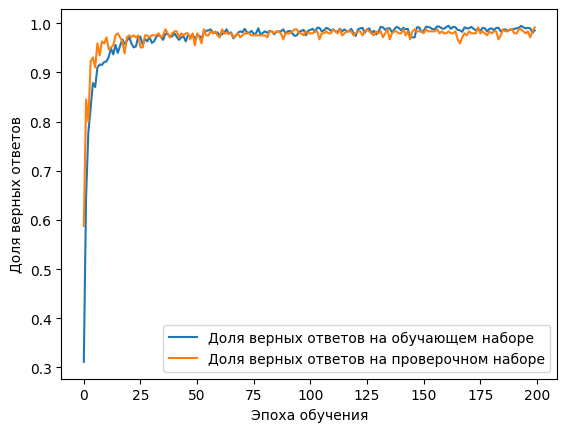

In [49]:
# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

**Вывод матрицы ошибок**

In [50]:
# Импорт метода построения confusion_matrix
from sklearn.metrics import confusion_matrix
# Импорт метода визуализации confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [51]:
y_true = y_test_org # как одномерного массива из списка индекса
y_pred_probabilities = model.predict(X_test)
# Получение меток классов из OHE предсказаний
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

17/17 [==============================] - 0s 3ms/step


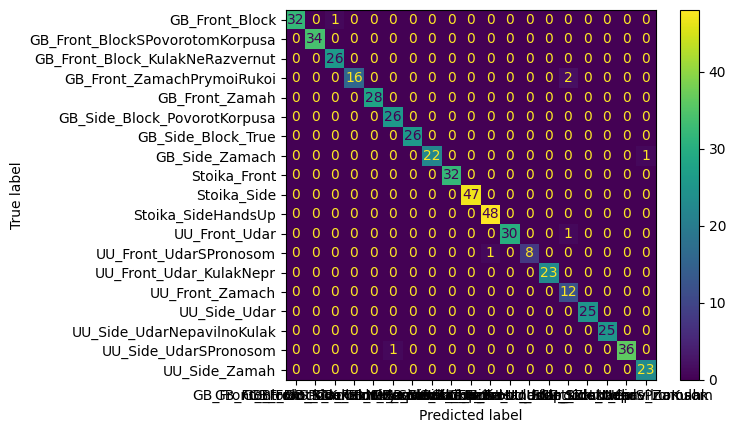

In [52]:
# Вычисление матрицы ошибок
cm = confusion_matrix(y_true, y_pred_labels)
# Визуализация матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classes_list)
disp.plot()
plt.show()

In [53]:
scores = model.evaluate(X_test, y_test, verbose=1)

17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9867


**Сохранение**

In [33]:
model.save('Data75_columns_200_epoch_19_classes.h5')

# Тестирование модели на данных Дмитрия

**Импорт данных Дмитрия для какого то видео**

In [54]:
df = pd.read_csv(r"D:\UII\Stazhirovka_4_Karate\Dmitriy_Data.csv", sep = ";")
df.tail(2)

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,Z22,X23,Y23,Z23,X24,Y24,Z24,X25,Y25,Z25
1121,-2.516935,0.842439,-2.102217,-2.542002,0.456662,-2.035487,-2.582423,0.091959,-2.129418,-2.561752,...,-1.775528,-2.249043,0.889167,-1.725017,-2.260697,0.90410,-1.705654,-2.275219,0.917023,-1.715839
1122,-2.511048,0.846956,-2.101457,-2.526315,0.462069,-2.025460,-2.575607,0.095422,-2.130389,-2.554825,...,-1.778929,-2.223665,0.890527,-1.735270,-2.238202,0.90545,-1.713198,-2.255058,0.917551,-1.720175


In [57]:
def PredictPosesInDataframe(df):
    np_data=df.values
    for i, array in enumerate(np_data):
        x = np_data[i]
        x = np.expand_dims(x, axis=0)
        prediction = model.predict(x)
        pred = np.argmax(prediction)
        max_probabilities = np.max(prediction, axis=1)
        print(f'{i} - Распознан класс {classes_list[pred]} с вероятностью в %: {(max_probabilities * 100).round(1)}')
    

In [58]:
PredictPosesInDataframe(df)

1/1 [==============================] - 0s 55ms/step
0 - Распознан класс GB_Front_ZamachPrymoiRukoi с вероятностью в %: [100.]
1/1 [==============================] - 0s 20ms/step
1 - Распознан класс GB_Front_ZamachPrymoiRukoi с вероятностью в %: [100.]
1/1 [==============================] - 0s 19ms/step
2 - Распознан класс GB_Front_ZamachPrymoiRukoi с вероятностью в %: [100.]
1/1 [==============================] - 0s 20ms/step
3 - Распознан класс GB_Front_ZamachPrymoiRukoi с вероятностью в %: [100.]
1/1 [==============================] - 0s 22ms/step
4 - Распознан класс GB_Front_ZamachPrymoiRukoi с вероятностью в %: [100.]
1/1 [==============================] - 0s 20ms/step
5 - Распознан класс GB_Front_ZamachPrymoiRukoi с вероятностью в %: [100.]
1/1 [==============================] - 0s 22ms/step
6 - Распознан класс GB_Front_ZamachPrymoiRukoi с вероятностью в %: [100.]
1/1 [==============================] - 0s 21ms/step
7 - Распознан класс GB_Front_ZamachPrymoiRukoi с вероятностью в %: